# Tests with different learning ratio

In [1]:
import os
os.chdir('..')
os.getcwd()

'/Users/antonismand/Desktop/Personalized-News-Recommendation'

In [2]:
%load_ext autoreload
%autoreload 2
from bandits import *
from evaluator import evaluate
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
%%time
import dataset
files = ("dataset/R6/ydata-fp-td-clicks-v1_0.20090502","dataset/R6/ydata-fp-td-clicks-v1_0.20090503")
dataset.get_yahoo_events(files)

7646058 events with 62 articles
CPU times: user 3min 20s, sys: 5.31 s, total: 3min 25s
Wall time: 3min 26s


In [4]:
_, deploy = evaluate(Egreedy(1))
rnd_ctr = deploy[-1]

Egreedy (ε=1)       0.0311    14.5s


Egreedy (ε=0.1)     0.038     19.5s
Egreedy (ε=0.1)     0.0396    19.5s
Egreedy (ε=0.1)     0.0414    19.4s
Egreedy (ε=0.1)     0.0438    19.6s


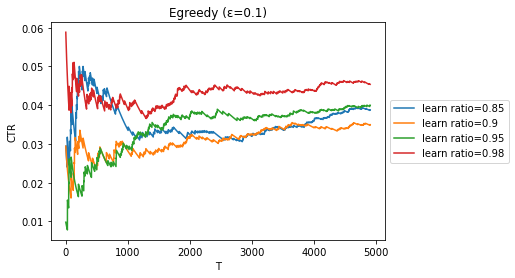

UCB1 (α=0.1)        0.0427    40.6s
UCB1 (α=0.1)        0.0425    40.7s
UCB1 (α=0.1)        0.0459    40.5s
UCB1 (α=0.1)        0.0452    40.5s


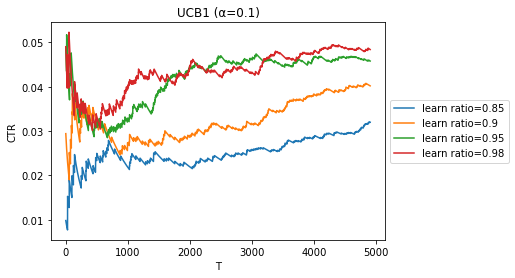

LinUCB (α=0.3, context:both)0.0499    5.0m
LinUCB (α=0.3, context:both)0.0514    5.6m
LinUCB (α=0.3, context:both)0.0523    6.1m
LinUCB (α=0.3, context:both)0.0532    6.5m


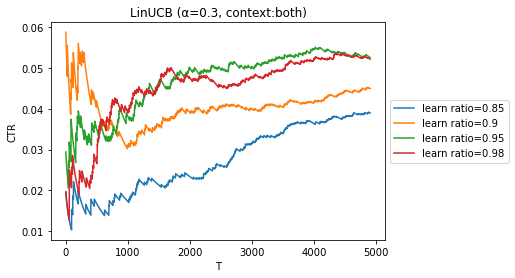

LinUCB (α=0.3, context:user)0.0502    5.0m
LinUCB (α=0.3, context:user)0.0505    5.2m
LinUCB (α=0.3, context:user)0.0514    5.0m
LinUCB (α=0.3, context:user)0.0549    5.2m


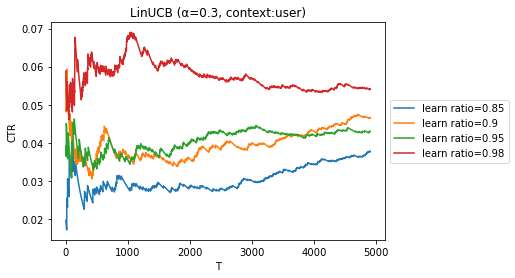

In [5]:
ratio = [0.85,0.9,0.95,0.98]
results = [['Ratio','Bucket','Algorithm','CTR Lift']]

algorithms = [Egreedy(0.1),Ucb1(0.1),LinUCB(0.3,context="both"), LinUCB(0.3,context="user") ]

for test in algorithms:
    for r in ratio:
        learn ,deploy = evaluate(test,size=100,learn_ratio=r)
        results.append([r,'learn',test.algorithm, learn[-1]/rnd_ctr])
        results.append([r,'deploy',test.algorithm, deploy[-1]/rnd_ctr])
        
        plt.plot(deploy[100:5000], label="learn ratio={}".format(r))
        
    plt.title(test.algorithm)
    plt.xlabel("T")
    plt.ylabel("CTR")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()